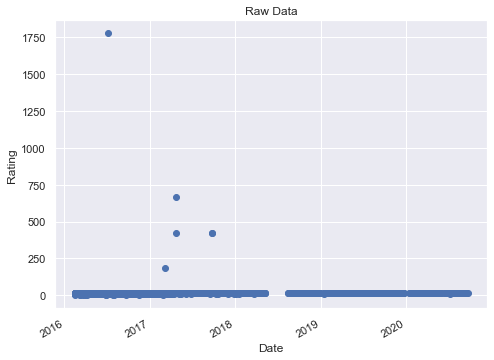

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
import matplotlib.dates as mdates
import seaborn
seaborn.set()
data = pd.read_csv("dog_rates_tweets.csv", parse_dates=[1])
data['rating'] = data.text.str.extract(r'(\d+(\.\d+)?)/10')[0]
data['status'] = data.rating.notna()
data_status = data.status
data = data[data_status]
data['rating'] = pd.to_numeric(data['rating'])
data_rating = data['rating']
data = data.drop(columns=['status'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(data.created_at, data.rating)
ax.set_xlabel('Date')
ax.set_ylabel('Rating')
ax.set_title("Raw Data")
fig.autofmt_xdate()
plt.show() 

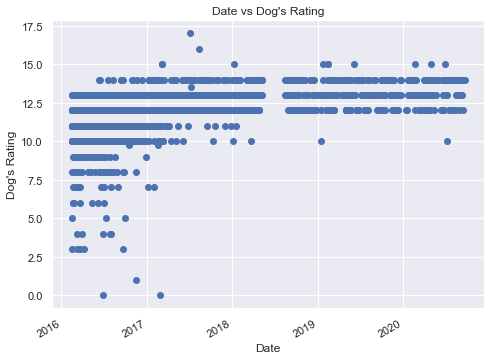

In [10]:
data = data[data_rating < 25]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(data.created_at, data.rating)
ax.set_xlabel('Date')
ax.set_ylabel("Dog's Rating")
ax.set_title("Date vs Dog's Rating")
fig.autofmt_xdate()
plt.show() 

In [11]:
def to_timestamp(d):
    return datetime.timestamp(d)
data['timestamp'] = data['created_at'].apply(to_timestamp)
fit = linregress(data['timestamp'], data['rating'])
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

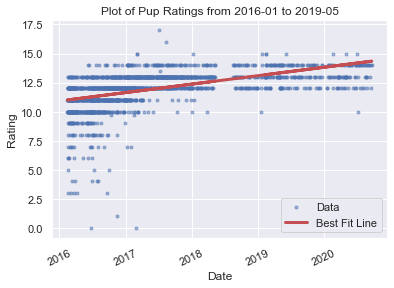

In [12]:
plt.xticks(rotation=25)
pl1, = plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
pl2, = plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.xlabel("Date")
plt.ylabel("Rating")
plt.title("Plot of Pup Ratings from 2016-01 to 2019-05")
plt.legend([pl1, pl2], ['Data', 'Best Fit Line'])
plt.show()

In [13]:
data2 = data
data2['month'] = pd.DatetimeIndex(data2['created_at']).month
data2['year'] = pd.DatetimeIndex(data2['created_at']).year

In [14]:
avgs = data2.groupby(['year', 'month']).mean().reset_index()
avgs = avgs.drop(columns=['id', 'timestamp', 'prediction'])
avgs['ym'] = pd.to_datetime(avgs[['year', 'month']].assign(Day=1))

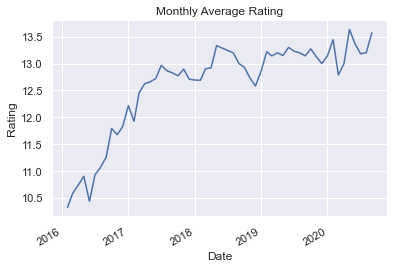

In [15]:
fig, ax = plt.subplots()
ax.plot(avgs['ym'], avgs['rating'])
plt.xlabel("Date")
plt.ylabel("Rating")
plt.title("Monthly Average Rating")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

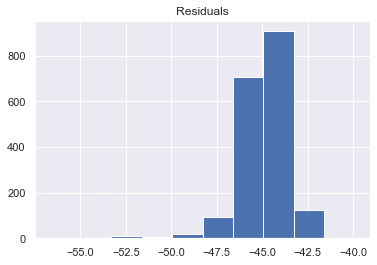

In [16]:
re = data['rating'] - data['timestamp'] * fit.slope + fit.intercept
plt.hist(re)
plt.title("Residuals")
plt.show()